# Проект для  HR-аналитиков компании «Работа с заботой»

### **Описание проекта**

**Заказчик:** HR-отдел компании «Работа с заботой»

**Описание данных** 

Данные содержат характеристики сотрудников компании, в том числе два таргета:

- уровень удовлетворенности работой
- уволится сотрудник, или же нет

### **Цели проекта**

1) Построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. Удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.

2) Построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

### **Ход иследования**

Задача 1: предсказание уровня удовлетворённости сотрудника

- **Подготовка данных**: загрузка и изучение общей информации из предоставленного датасета.

- **Предобработка данных**: корректировка типов данных, дубликатов.

- **Исследовательский анализ данных**: описание и визуалиция информации обо всех признаках, устранение аномалий, корреляционный анализ.

- **Подготовка данных**: кодирование и масштабирование признаков перед обучением модели, обработка пропусков.

- **Обучение моделей**: обучение двух моделей для задачи классификации, подбор гиперпараметров, оценка качества.

- **Промежуточный вывод** о том, какая модель справилась лучше и почему.


Задача 2: предсказание увольнения сотрудника из компании

- **Подготовка данных**: загрузка и изучение общей информации из предоставленного датасета, обработка пропусков.

- **Предобработка данных**: корректировка типов данных, дубликатов.

- **Исследовательский анализ данных**: описание и визуалиция информации обо всех признаках, устранение аномалий, корреляционный анализ.

- **Добавление нового входного признака**: добавление job_satisfaction_rate, предсказанного лучшей моделью первой задачи, к входным признакам второй задачи.

- **Подготовка данных**: кодирование и масштабирование признаков перед обучением модели.

- **Обучение моделей**: обучение двух моделей для задачи классификации, подбор гиперпараметров, оценка качества.

- **Промежуточный вывод** о том, какая модель справилась лучше и почему.



**Общий вывод** и подведение итогов по проделанным работам, рекомендации заказчику.

<a id=содержание></a>
### **Содержание**

Задача 1: предсказание уровня удовлетворённости сотрудника

[Шаг 1. Загрузка данных](#1)

[Шаг 2. Предобработка данных](#2)

[Шаг 3. Исследовательский анализ данных](#3)

[Шаг 4. Подготовка данных](#4)

[Шаг 5. Обучение моделей](#5)

[Шаг 6. Промежуточный вывод](#6)

Задача 2: предсказание увольнения сотрудника из компании

[Шаг 1. Загрузка данных](#7)

[Шаг 2. Предобработка данных](#8)

[Шаг 3. Исследовательский анализ данных](#9)

[Шаг 4. Добавление нового входного признака](#10)

[Шаг 5. Подготовка данных](#11)

[Шаг 6. Обучение моделей](#12)

[Шаг 7. Промежуточный вывод](#13)

[Шаг 8. Итоговый вывод](#14)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

!pip install shap
import shap

!pip install phik
from phik import phik_matrix

from scipy import stats as st

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor, DummyClassifier

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import (StandardScaler,                              
                                   OneHotEncoder,
                                   OrdinalEncoder,
                                   LabelEncoder
                                  )

from sklearn.metrics import (confusion_matrix,
                             roc_auc_score,
                             make_scorer
                            )

RANDOM_STATE = 42

# Задача 1. Предсказание уровня удовлетворённости сотрудника

<a id=1></a>
## Загрузка данных

[Назад к содержанию](#содержание)

In [2]:
train_job_satisfaction_rate = pd.read_csv('/train_satisfaction.csv')
test_features = pd.read_csv('/test_features.csv')
test_target_job_satisfaction_rate = pd.read_csv('/test_satisfaction.csv')

display(
        train_job_satisfaction_rate,
        test_features,
        test_target_job_satisfaction_rate
)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20
...,...,...,...,...,...,...,...,...,...,...
3995,457950,technology,junior,high,2,no,no,3,46800,0.45
3996,957499,sales,junior,medium,2,no,no,4,21600,0.68
3997,533318,sales,middle,low,7,no,no,5,24000,0.76
3998,706868,sales,junior,medium,2,no,no,3,24000,0.48


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800
...,...,...,...,...,...,...,...,...,...
1995,393147,marketing,junior,low,3,no,no,3,20400
1996,109582,technology,middle,low,3,no,no,2,21600
1997,305653,technology,junior,low,1,no,no,3,14400
1998,160233,technology,middle,low,8,no,no,1,32400


,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08
...,...,...
1995,405257,0.28
1996,370925,0.21
1997,857722,0.39
1998,303402,0.26


In [3]:
train_job_satisfaction_rate.info()
display('')
test_features.info()
display('')
test_target_job_satisfaction_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


**Вывод по знакомству с данными**

- В датасете train_job_satisfaction_rate 10 столбцов и 4000 строк. Количество ненулевых значений по столбцам отличается — значит, в датасете есть пропуски.
- Он состоит из следующих типов данных:
   - object
   - int64
   - float64
   
   
- В датасете test_features 9 столбцов и 2000 строк. Количество ненулевых значений по столбцам отличается — значит, в датасете есть пропуски.
- Он состоит из следующих типов данных:
   - object
   - int64
      
- В датасете test_target_job_satisfaction_rate 2 стобца и 2000 строк.
- Он состоит из следующих типов данных:
   - float64
   - int64
    
    
- Названия всех столбцов написаны в едином корректном стиле Snake_case;
- Данные соответствую своему описанию.

<a id=2></a>
## Предобработка данных

[Назад к содержанию](#содержание)

Проверим данные на наличие пропусков.

In [4]:
display(
    train_job_satisfaction_rate.isna().sum(), 
    test_features.isna().sum(),
    test_target_job_satisfaction_rate.isna().sum()
)

id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

id                       0
job_satisfaction_rate    0
dtype: int64

Есть пропуски в столбцах dept и level датасета train_job_satisfaction_rate, а также в столбцах dept и level датасета test_features. Мы заполним их чуть позже на шаге построения пайплайна. Далее проверим полные дубликаты.

In [5]:
display(
    train_job_satisfaction_rate.duplicated().sum(), 
    test_features.duplicated().sum(),
    test_target_job_satisfaction_rate.duplicated().sum()
)

0

0

0

Явных дубликатов нет, проверим неявные.

In [6]:
display(train_job_satisfaction_rate.duplicated(subset=['id'], keep=False).unique(), '',
        train_job_satisfaction_rate['dept'].unique(), '',
        train_job_satisfaction_rate['level'].unique(), '',
        train_job_satisfaction_rate['workload'].unique(), '',
        train_job_satisfaction_rate['last_year_promo'].unique(), '',
        train_job_satisfaction_rate['last_year_violations'].unique()
       )
        

array([False])

''

array(['sales', 'hr', 'technology', 'purchasing', 'marketing', nan],
      dtype=object)

''

array(['junior', 'middle', 'sinior', nan], dtype=object)

''

array(['medium', 'high', 'low'], dtype=object)

''

array(['no', 'yes'], dtype=object)

''

array(['no', 'yes'], dtype=object)

Неявных дубликатов не обнаружено, но есть значения nan в столбцах dept и level. Это пропуски, с ними разберемся позже.  Сейчас заменим значения 'sinior' в столбце level на 'senior'

In [7]:
train_job_satisfaction_rate.loc[train_job_satisfaction_rate['level'] == 'sinior', 'level'] = 'senior'
train_job_satisfaction_rate['level'].unique()

array(['junior', 'middle', 'senior', nan], dtype=object)

In [8]:
display(test_features.duplicated(subset=['id'], keep=False).unique(), '',
        test_features['dept'].unique(), '',
        test_features['level'].unique(), '',
        test_features['workload'].unique(), '',
        test_features['last_year_promo'].unique(), '',
        test_features['last_year_violations'].unique()
       )

array([False])

''

array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan, ' '],
      dtype=object)

''

array(['junior', 'middle', 'sinior', nan], dtype=object)

''

array(['medium', 'low', 'high', ' '], dtype=object)

''

array(['no', 'yes'], dtype=object)

''

array(['no', 'yes'], dtype=object)

В столбцах dept и workload есть пробелы, посмотрим на них. Также заменим 'sinior' в столбце level на 'senior'

In [9]:
test_features.loc[test_features['level'] == 'sinior', 'level'] = 'senior'
display(test_features['level'].unique(),
        test_features[test_features['dept'] == ' '],
        test_features[test_features['workload'] == ' ']
)

array(['junior', 'middle', 'senior', nan], dtype=object)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
1699,822186,,middle,medium,3,no,no,4,38400


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
15,590867,marketing,junior,,4,no,no,4,28800


Фактически эти пробелы — пропуски, заменим их на Nan и в дальнейшем обработаем с помощью пайплайна.

In [10]:
test_features.loc[test_features['dept'] == ' ', 'dept'] = np.nan
test_features.loc[test_features['workload'] == ' ', 'workload'] = np.nan
display(test_features['dept'].unique(), test_features['workload'].unique())

array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan],
      dtype=object)

array(['medium', 'low', 'high', nan], dtype=object)

In [11]:
test_target_job_satisfaction_rate.duplicated(subset=['id'], keep=False).unique()

array([False])

В test_target_job_satisfaction_rate неявных дубликатов не обнаружено. Далее посмотрим на корректность типов данных.

In [12]:
display(train_job_satisfaction_rate.head(), train_job_satisfaction_rate.dtypes)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


id                         int64
dept                      object
level                     object
workload                  object
employment_years           int64
last_year_promo           object
last_year_violations      object
supervisor_evaluation      int64
salary                     int64
job_satisfaction_rate    float64
dtype: object

In [13]:
display(test_features.head(), test_features.dtypes)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


id                        int64
dept                     object
level                    object
workload                 object
employment_years          int64
last_year_promo          object
last_year_violations     object
supervisor_evaluation     int64
salary                    int64
dtype: object

In [14]:
display(test_target_job_satisfaction_rate.head(), test_target_job_satisfaction_rate.dtypes)

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


id                         int64
job_satisfaction_rate    float64
dtype: object

Все типы данных присвоены корректно. Ещё раз выведем на экран все пропуски.

In [15]:
display(
    train_job_satisfaction_rate.isna().sum(), 
    test_features.isna().sum(),
    test_target_job_satisfaction_rate.isna().sum()
)

id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

id                       0
dept                     3
level                    1
workload                 1
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

id                       0
job_satisfaction_rate    0
dtype: int64

**Вывод по предобработке данных**

- в данных не обнаружено явных или неявных дубликатов
- обнаружены пропуски в столбцах dept и level датасета train_job_satisfaction_rate, а также в столбцах dept, level и workload датасета test_features. Они будут заполнены на шаге построения пайплайна.
- значения 'sinior' в столбце level заменены на 'senior' (датасеты train_job_satisfaction_rate, test_features)

<a id=3></a>
## Исследовательский анализ данных
[Назад к содержанию](#содержание)

### Построение и анализ графиков


Для начала проаназируем категориальные признаки тренировочной выборки.

'Частота значений для признака: dept'

sales         1512
technology     866
purchasing     610
marketing      550
hr             456
Name: dept, dtype: int64

'Частота значений для признака: level'

junior    1894
middle    1744
senior     358
Name: level, dtype: int64

'Частота значений для признака: workload'

medium    2066
low       1200
high       734
Name: workload, dtype: int64

'Частота значений для признака: last_year_promo'

no     3880
yes     120
Name: last_year_promo, dtype: int64

'Частота значений для признака: last_year_violations'

no     3441
yes     559
Name: last_year_violations, dtype: int64

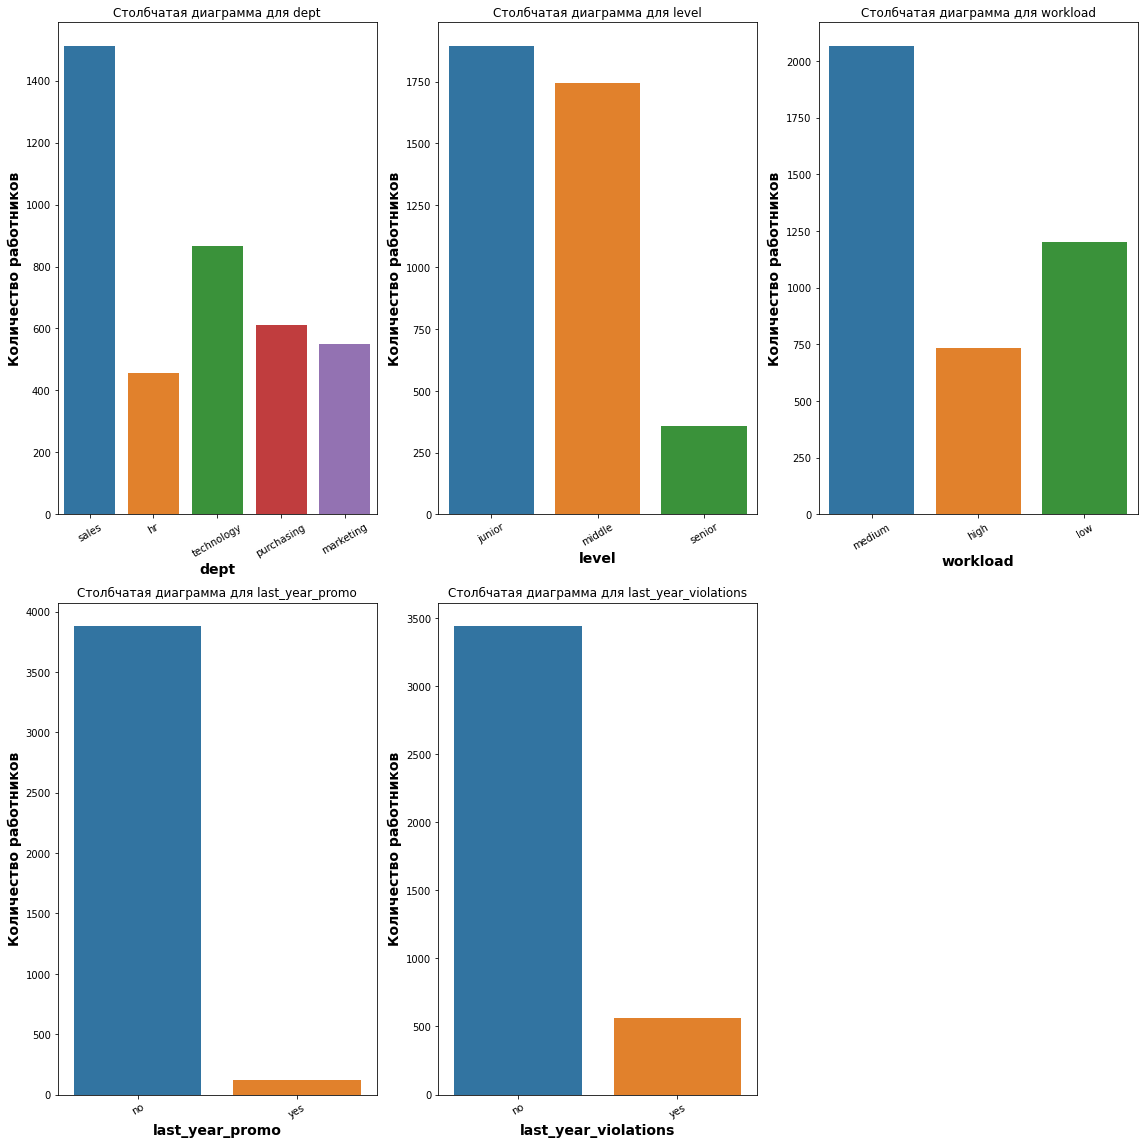

In [16]:
cat_features = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations']

plt.figure(figsize=(16, 16))
for i, feature in enumerate(cat_features, start=1):
    
    plt.subplot(2, 3, i)
    sns.countplot(data=train_job_satisfaction_rate, x=feature)
    plt.title(f'Столбчатая диаграмма для {feature}')
    plt.ylabel('Количество работников', fontsize=14, fontweight='bold')
    plt.xlabel(feature, fontsize=14, fontweight='bold')
    plt.xticks(rotation=30)
    display(f'Частота значений для признака: {feature}',
            train_job_satisfaction_rate[feature].value_counts()
           )
    
plt.tight_layout()   
plt.show()    

- Большинство сотрудников работают в отделе продаж (1512 чел.), меньшинство - в hr (456 чел.);
- Большинство сотрудников работает на уровне junior (1894 чел.), меньшинство — на уровне сеньора (358 чел.);
- У большинства сотрудников средний уровень нагрузки (2066 чел.), у меньшинства — высокий (734 чел.);
- Большинство сотрудников  не получали повышения за последний год (3880 чел.), меньшинство — получали (120 чел.);
- У большинства сотрудников не было нарушений трудового договора за последний год (3441 чел.), у меньшинства — были нарушения (559 чел.)



Теперь проанализируем количественные признаки.

'Описание признака: salary'

count     4000.000000
mean     33926.700000
std      14900.703838
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      98400.000000
Name: salary, dtype: float64

'Описание признака: job_satisfaction_rate'

count    4000.000000
mean        0.533995
std         0.225327
min         0.030000
25%         0.360000
50%         0.560000
75%         0.710000
max         1.000000
Name: job_satisfaction_rate, dtype: float64

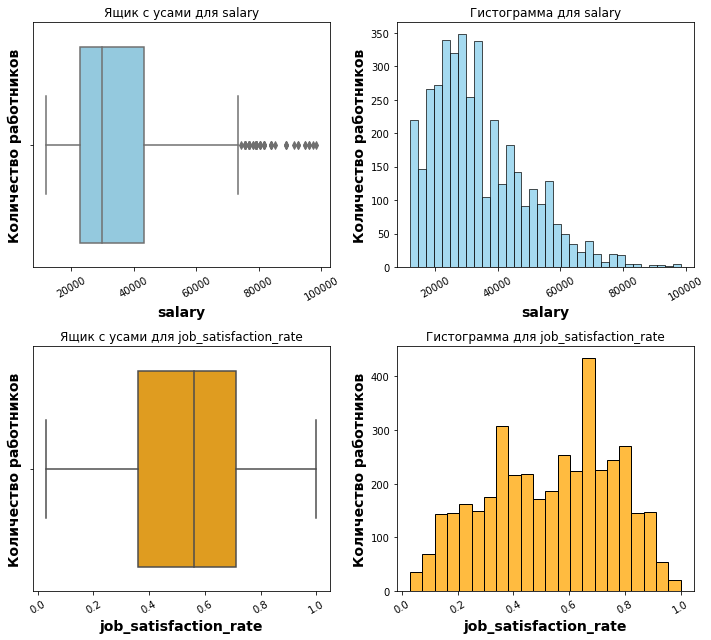

In [17]:
num_features = ['salary', 'job_satisfaction_rate']
discrete_features = ['employment_years', 'supervisor_evaluation']
colors = ['skyblue', 'orange', 'lightgreen', 'red']

plt.figure(figsize=(10, 9))
for i, (feature, color) in enumerate(zip(num_features, colors), start=1):
    
    plt.subplot(2, 2, i * 2 - 1)
    sns.boxplot(data=train_job_satisfaction_rate, x=feature, color=color)
    plt.title(f'Ящик с усами для {feature}')
    plt.ylabel('Количество работников', fontsize=14, fontweight='bold')
    plt.xlabel(feature, fontsize=14, fontweight='bold')
    plt.xticks(rotation=30)
    
    plt.subplot(2, 2, i * 2)
    sns.histplot(data=train_job_satisfaction_rate, x=feature, color=color)
    plt.title(f'Гистограмма для {feature}')
    plt.ylabel('Количество работников', fontsize=14, fontweight='bold')
    plt.xlabel(feature, fontsize=14, fontweight='bold')
    plt.xticks(rotation=30)
    
    display(f'Описание признака: {feature}',
            train_job_satisfaction_rate[feature].describe()
           )
    
plt.tight_layout()   
plt.show()    

'Описание признака: employment_years'

count    4000.000000
mean        3.718500
std         2.542513
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64

'Описание признака: supervisor_evaluation'

count    4000.000000
mean        3.476500
std         1.008812
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64

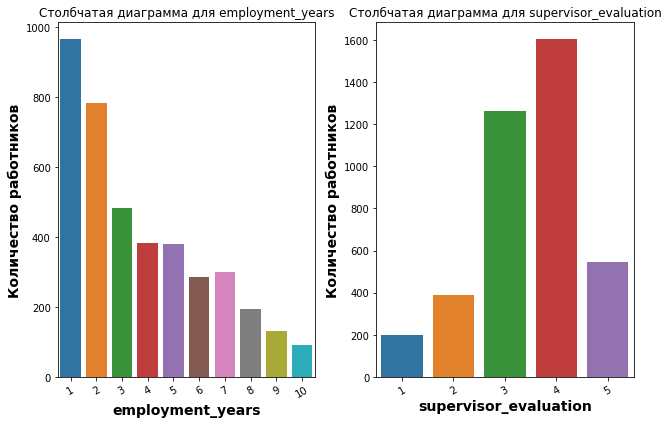

In [18]:
plt.figure(figsize=(9, 6))
for i, feature in enumerate(discrete_features, start=1):
    
    plt.subplot(1, 2, i)
    sns.countplot(data=train_job_satisfaction_rate, x=feature)
    plt.title(f'Столбчатая диаграмма для {feature}')
    plt.ylabel('Количество работников', fontsize=14, fontweight='bold')
    plt.xlabel(feature, fontsize=14, fontweight='bold')
    plt.xticks(rotation=30)
    
    display(f'Описание признака: {feature}',
            train_job_satisfaction_rate[feature].describe()
           )
    
plt.tight_layout()   
plt.show()

In [19]:
train_job_satisfaction_rate['supervisor_evaluation'].value_counts()

4    1603
3    1263
5     546
2     387
1     201
Name: supervisor_evaluation, dtype: int64

- Для признака employment_years характерно распределение Пуассона, минимальное значение — год, максимальное — 10 лет;
- Распределение признака supervisor_evaluation больше похоже на распределение категориального признака — все наблюдения распределены между пятью значениями признака. Самая частая оценка - 4 (1603 сотрудника), самая редкая — 1 (201 сотрудник);
- Для признака salary характерно распределение Пуассона, минимальное значение — 12000, максимальное — 98400. Медианная зп - 30000. Также видим довольно много наблюдений за «усом» боксплота - это сотрудники с самой высокой зарплатой. Нам не стоит удалять эти наблюдения. Предположим, что такие сотрудники — самые важные, тогда наша модель определённо должна предсказывать удовлетворённость этой группы её работой. В первую очередь мы хотим сохранить именно таких сотрудников, поэтому у модели должна быть о них информация.
- Для целевого признака job_satisfaction_rate характерно нормальное распределение, минимальное значение — 0.03, максимальное — 1. Медианное — 0.56. 


Далее проведём такой же анализ признаков, но уже для тестовой выборки. В этот раз занесём supervisor_evaluation в группу категориальных признаков.

'Частота значений для признака: dept'

sales         763
technology    455
marketing     279
purchasing    273
hr            227
Name: dept, dtype: int64

'Частота значений для признака: level'

junior    974
middle    854
senior    171
Name: level, dtype: int64

'Частота значений для признака: workload'

medium    1043
low        593
high       363
Name: workload, dtype: int64

'Частота значений для признака: last_year_promo'

no     1937
yes      63
Name: last_year_promo, dtype: int64

'Частота значений для признака: last_year_violations'

no     1738
yes     262
Name: last_year_violations, dtype: int64

'Частота значений для признака: supervisor_evaluation'

4    857
3    575
5    284
2    196
1     88
Name: supervisor_evaluation, dtype: int64

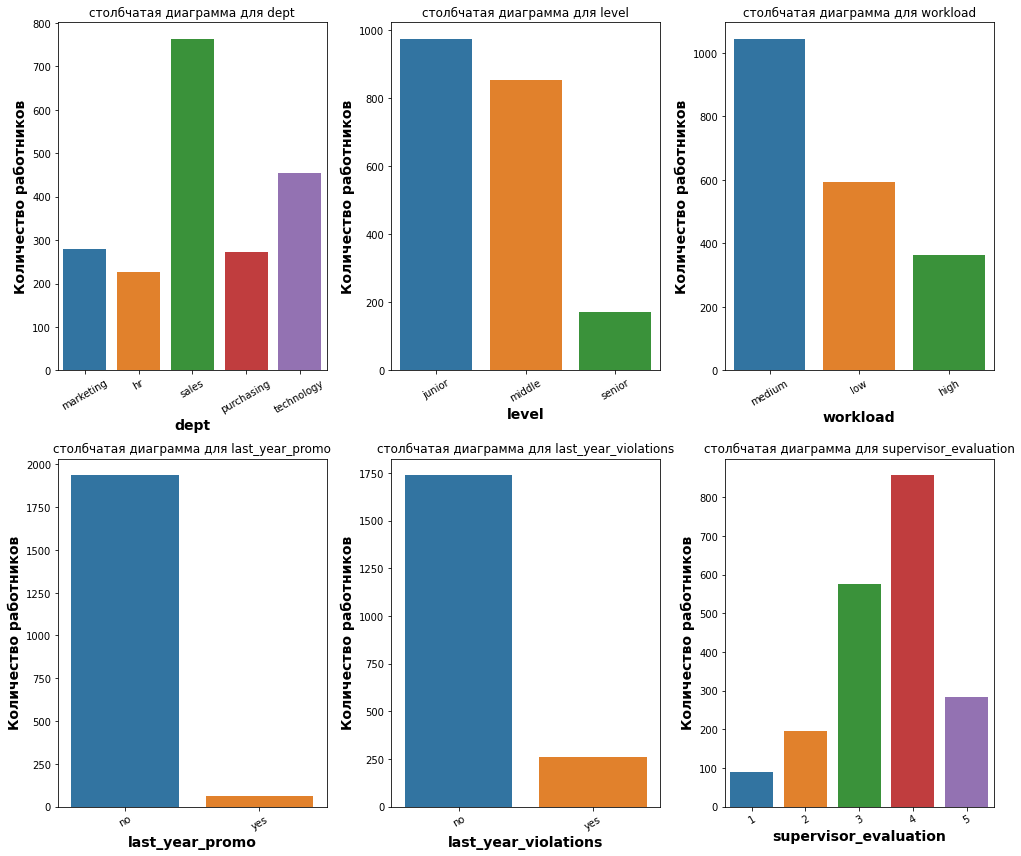

In [20]:
cat_features = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations', 'supervisor_evaluation']
num_features = ['employment_years', 'salary', 'job_satisfaction_rate']

plt.figure(figsize=(14, 12))
for i, feature in enumerate(cat_features, start=1):
    
    plt.subplot(2, 3, i)
    sns.countplot(data=test_features, x=feature)
    plt.title(f'столбчатая диаграмма для {feature}')
    plt.ylabel('Количество работников', fontsize=14, fontweight='bold')
    plt.xlabel(feature, fontsize=14, fontweight='bold')
    plt.xticks(rotation=30)
    display(f'Частота значений для признака: {feature}',
            test_features[feature].value_counts()
           )
    
plt.tight_layout()   
plt.show()  

- Большинство сотрудников, как и в тренировочной выборке, работают в отделе продаж (763 чел.), меньшинство - в hr (227 чел.);
- Большинство сотрудников работает на уровне junior (974 чел.), меньшинство — на уровне сеньора (171 чел.);
- У большинства сотрудников средний уровень нагрузки (1043 чел.), у меньшинства — высокий (363 чел.);
- Большинство сотрудников  не получали повышения за последний год (1937 чел.), меньшинство — получали (63 чел.);
- У большинства сотрудников не было нарушений трудового договора за последний год (1738 чел.), у меньшинства — были нарушения (262 чел.);
- Самая частая оценка supervisor_evaluation - 4 (857 сотрудника), самая редкая — 1 (88 сотрудник).


Теперь проанализируем количественные признаки.

count     2000.000000
mean     34066.800000
std      15398.436729
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64

count    2000.000000
mean        3.666500
std         2.537222
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64

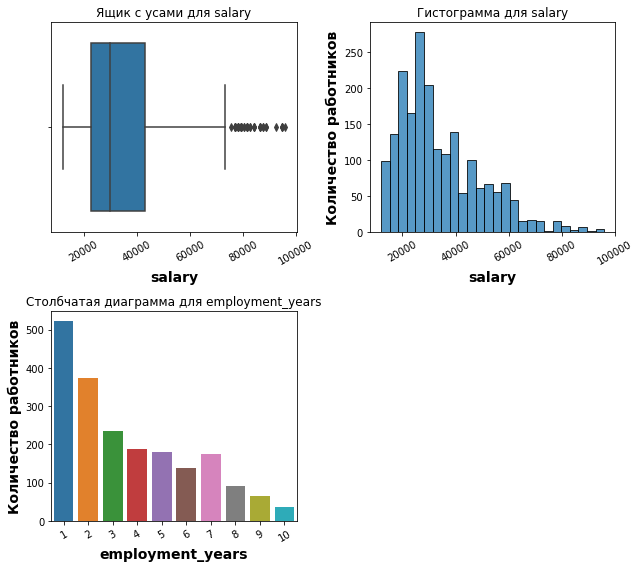

In [21]:
plt.figure(figsize=(9, 8))

plt.subplot(2, 2, 1)
sns.boxplot(data=test_features, x='salary')
plt.title('Ящик с усами для salary')
plt.xlabel('salary', fontsize=14, fontweight='bold')
plt.xticks(rotation=30)

plt.subplot(2, 2, 2)
sns.histplot(data=test_features, x='salary')
plt.title('Гистограмма для salary')
plt.ylabel('Количество работников', fontsize=14, fontweight='bold')
plt.xlabel('salary', fontsize=14, fontweight='bold')
plt.xticks(rotation=30)

plt.subplot(2, 2, 3)
sns.countplot(data=test_features, x='employment_years')
plt.title('Столбчатая диаграмма для employment_years')
plt.ylabel('Количество работников', fontsize=14, fontweight='bold')
plt.xlabel('employment_years', fontsize=14, fontweight='bold')
plt.xticks(rotation=30)
display(
        test_features['salary'].describe(),
        test_features['employment_years'].describe(),
       )
    
plt.tight_layout()   
plt.show()    

count    2000.00000
mean        0.54878
std         0.22011
min         0.03000
25%         0.38000
50%         0.58000
75%         0.72000
max         1.00000
Name: job_satisfaction_rate, dtype: float64

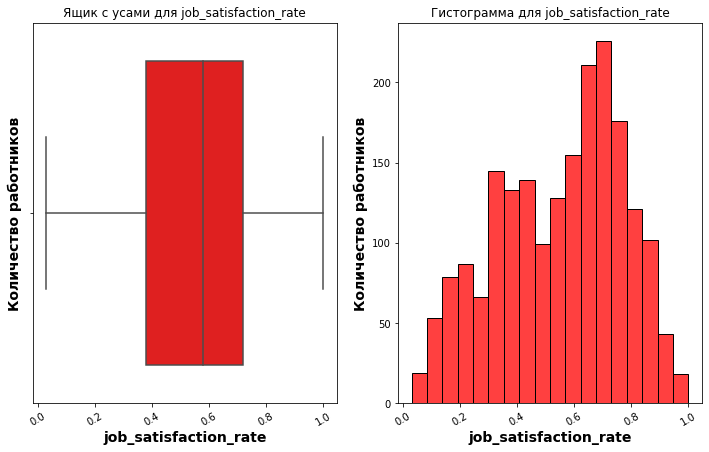

In [22]:
plt.figure(figsize=(12, 7))

plt.subplot(1, 2, 1)
sns.boxplot(data=test_target_job_satisfaction_rate, x='job_satisfaction_rate', color='red')
plt.title('Ящик с усами для job_satisfaction_rate')
plt.ylabel('Количество работников', fontsize=14, fontweight='bold')
plt.xlabel('job_satisfaction_rate', fontsize=14, fontweight='bold')
plt.xticks(rotation=30)

plt.subplot(1, 2, 2)
sns.histplot(data=test_target_job_satisfaction_rate, x='job_satisfaction_rate', color='red')
plt.title('Гистограмма для job_satisfaction_rate')
plt.ylabel('Количество работников', fontsize=14, fontweight='bold')
plt.xlabel('job_satisfaction_rate', fontsize=14, fontweight='bold')
plt.xticks(rotation=30)

plt.show

test_target_job_satisfaction_rate['job_satisfaction_rate'].describe()

- Для признака employment_years, как и в тренировочной выборке, характерно распределение Пуассона, минимальное значение — год, максимальное — 10 лет;
- Для признака salary также характерно распределение Пуассона, минимальное значение — 12000, максимальное — 96000. Медианная зп - 30000. На боксплоте также, как и в тренировочной выборке, много выбросов. Оставим эти наблюдения в выборке по той же причине. 
- Для целевого признака job_satisfaction_rate характерно нормальное распределение, минимальное значение — 0.03, максимальное — 1. Медианное — 0.58. 

Далее объединим таблицы test_features и test_target_job_satisfaction_rate.

In [23]:
train_job_satisfaction_rate = train_job_satisfaction_rate.set_index('id')

test_features = pd.merge(test_features, test_target_job_satisfaction_rate, on='id').set_index('id')
test_features

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.79
686555,hr,junior,medium,1,no,no,4,30000,0.72
467458,sales,middle,low,5,no,no,4,19200,0.64
418655,sales,middle,low,6,no,no,4,19200,0.60
789145,hr,middle,medium,5,no,no,5,40800,0.75
...,...,...,...,...,...,...,...,...,...
393147,marketing,junior,low,3,no,no,3,20400,0.56
109582,technology,middle,low,3,no,no,2,21600,0.14
305653,technology,junior,low,1,no,no,3,14400,0.11


**Вывод по исследовательскому анализу**

- Большинство сотрудников работают в отделе продаж (1512 чел.), меньшинство - в hr (456 чел.);
- Большинство сотрудников работает на уровне junior (1894 чел.), меньшинство — на уровне сеньора (358 чел.);
- У большинства сотрудников средний уровень нагрузки (2066 чел.), у меньшинства — высокий (734 чел.);
- Большинство сотрудников  не получали повышения за последний год (3880 чел.), меньшинство — получали (120 чел.);
- У большинства сотрудников не было нарушений трудового договора за последний год (3441 чел.), у меньшинства — были нарушения (559 чел.)
- Для признака employment_years характерно распределение Пуассона, минимальное значение — год, максимальное — 10 лет;
- Распределение признака supervisor_evaluation больше похоже на распределение категориального признака — все наблюдения распределены между пятью значениями признака. Самая частая оценка - 4 (1603 сотрудника), самая редкая — 1 (201 сотрудник);
- Для признака salary характерно распределение Пуассона, минимальное значение — 12000, максимальное — 98400. Медианная зп - 30000. Также видим довольно много наблюдений за «усом» боксплота - это сотрудники с самой высокой зарплатой. Нам не стоит удалять эти наблюдения. Предположим, что такие сотрудники — самые важные, тогда наша модель определённо должна предсказывать удовлетворённость этой группы её работой. В первую очередь мы хотим сохранить именно таких сотрудников, поэтому у модели должна быть о них информация.
- Для целевого признака job_satisfaction_rate характерно нормальное распределение, минимальное значение — 0.03, максимальное — 1. Медианное — 0.56. 

Таким образом, масштабировать мы будем только признаки employment_years и salary. supervisor_evaluation будем воспринимать как категориальный. Соответсвенно, будем его кодировать вместе с остальными категориальными признаками: dept, level, workload, last_year_promo, last_year_violations.

### Корреляционный анализ
[Назад к содержанию](#содержание)

Далее проведём корреляционный анализ тренировочной выборки. Так как большинство количественных признаков имеет ненормальное распределение — будем рассчитывать коэффициенты корреляции Спирмена, а не Пирсона. , Также в данных много категориальных признаков — поэтому потом рассчитаем ещё и коэффициенты phik.

<function matplotlib.pyplot.show(close=None, block=None)>

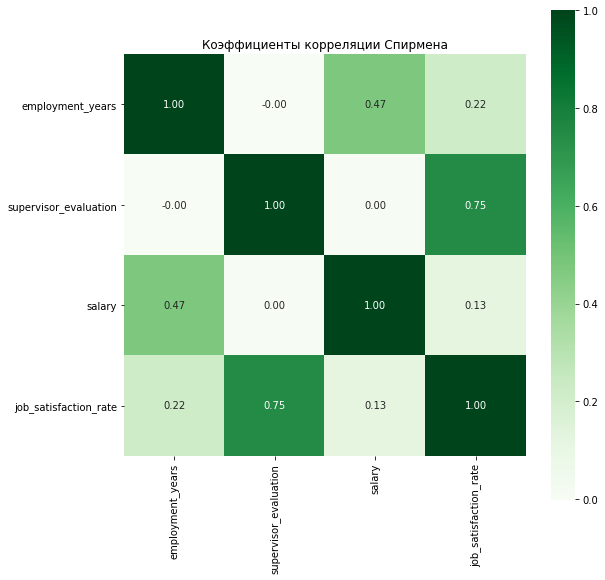

In [24]:
correlation_matrix = train_job_satisfaction_rate.corr('spearman')
plt.figure(figsize=(9,9))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt='.2f', square=True, cbar=True)
plt.title('Коэффициенты корреляции Спирмена')
plt.show()

- высокая положительная корреляция наблюдается между уровнем удовлетворенности сотрудника и оценкой качества его работы руководителем (0.75);
- средняя положительная корреляция между длительностью работы в компании и зп (0.47);
- слабая положительная корреляция между длительностью работы в компании и уровнем удовлетворенности сотрудника (0.22); между зп и уровнем удовлетворенности сотрудника (0.13).

<function matplotlib.pyplot.show(close=None, block=None)>

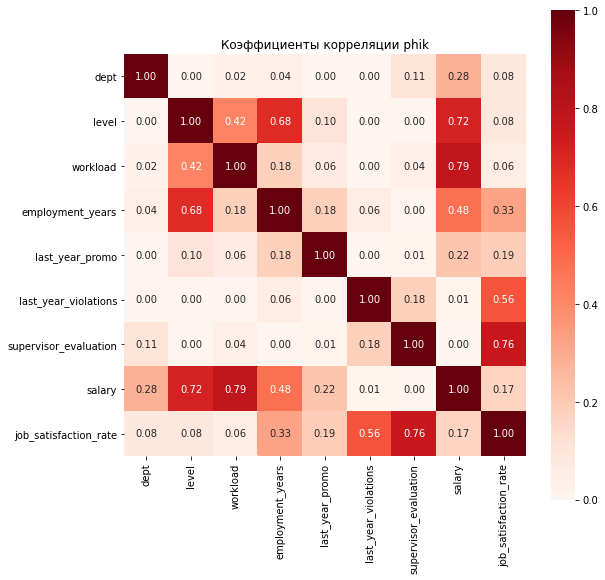

In [25]:
interval_cols = ['job_satisfaction_rate', 'salary']

phik_matrix = train_job_satisfaction_rate.phik_matrix(interval_cols=interval_cols)
plt.figure(figsize=(9,9))
sns.heatmap(phik_matrix, annot=True, cmap='Reds', fmt='.2f', square=True, cbar=True)
plt.title('Коэффициенты корреляции phik')
plt.show()

Коэффицициенты по упомянутым ранее парам признаков в целом сохранены — далее обратим внимание на новые:

- высокая корреляция между длительностью работы и уровнем сотрудника (0.68), между зп и уровнем сотрудника (0.72), между загрузкой сотрудника и его зп (0.79);
- средняя корреляция между зп и длительностью работы (0.48), уровнем сотрудника и нагрузкой (0.42), уровнем удовлетворенности и нарушениями ТД (0.56)
- слабая корреляция между зп и отделом (0.28), зп и повышением (0.22), оценками качества и отделом (0.11), оценками качества и нарушениями ТД (0.18), между уровнем удовлетворенности и повышением (0.19), между уровнем сотрудника и повышением (0.10), между длительностью работы и повышением (0.18), между длительностью работы и нагрузкой (0.18). 


Далее с помощью VIF оценим мультиколлинеарность количественных признаков. 

In [26]:
num_features = ['employment_years', 'salary', 'job_satisfaction_rate']

def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['feature'] = df.columns
    
    vif_data['VIF'] = [
        sm.OLS(df[col], sm.add_constant(df.drop(columns=col))).fit().rsquared for col in df.columns
    ]
    
    vif_data['VIF'] = 1 / (1 - vif_data['VIF'])
    
    return vif_data

vif_results = calculate_vif(train_job_satisfaction_rate[num_features])

print(vif_results)

                 feature       VIF
0       employment_years  1.315060
1                 salary  1.274828
2  job_satisfaction_rate  1.045819


Все значения в норме, они не превышают 1.7. Соответственно — мультиколлинеарности между количественными признаками нет. Далее построим матрицы корреляций по тестовой выборке — просто чтобы убедиться, что на ней ситуация не сильно меняется.

<function matplotlib.pyplot.show(close=None, block=None)>

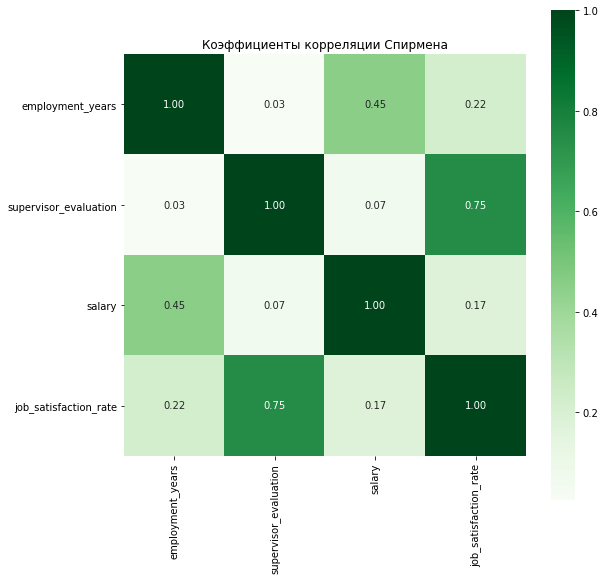

In [27]:
correlation_matrix = test_features.corr('spearman')
plt.figure(figsize=(9,9))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt='.2f', square=True, cbar=True)
plt.title('Коэффициенты корреляции Спирмена')
plt.show()

interval columns not set, guessing: ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']


<function matplotlib.pyplot.show(close=None, block=None)>

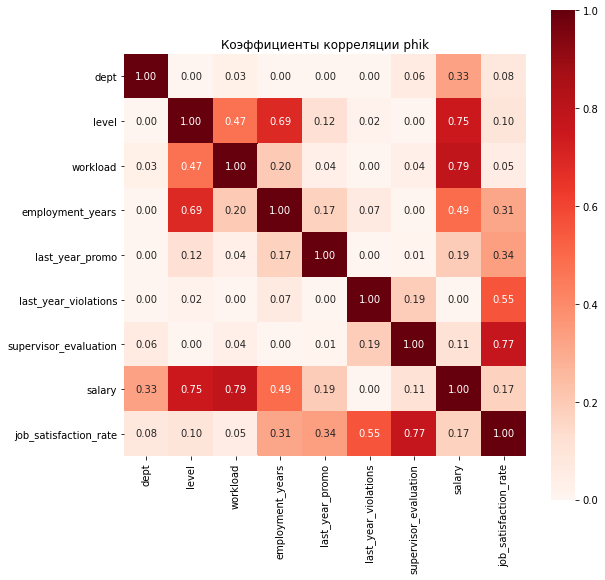

In [28]:
phik_matrix = test_features.phik_matrix(interval_cols=interval_cols)
plt.figure(figsize=(9,9))
sns.heatmap(phik_matrix, annot=True, cmap='Reds', fmt='.2f', square=True, cbar=True)
plt.title('Коэффициенты корреляции phik')
plt.show()

Общая картина сохраняется, однако слабая корреляция между уровнем удовлетворенности и повышением на тренировочной выборке была 0.19, а на тестовой стала 0.34, увеличилась почти в 2 раза.

**Вывод по корреляционному анализу**

**Выводы по анализу количественных признаков на основе коэффициентов Спирмена:**
- высокая положительная корреляция наблюдается между уровнем удовлетворенности сотрудника и оценкой качества его работы руководителем (0.75);
- средняя положительная корреляция между длительностью работы в компании и зп (0.47);
- слабая положительная корреляция между длительностью работы в компании и уровнем удовлетворенности сотрудника (0.22); между зп и уровнем удовлетворенности сотрудника (0.13).

**Выводы по анализу всех прихнаков на основе коэффициентов phik:**
- высокая корреляция между длительностью работы и уровнем сотрудника (0.68), между зп и уровнем сотрудника (0.72), между загрузкой сотрудника и его зп (0.79);
- средняя корреляция между зп и длительностью работы (0.48), уровнем сотрудника и нагрузкой (0.42), уровнем удовлетворенности и нарушениями ТД (0.56)
- слабая корреляция между зп и отделом (0.28), зп и повышением (0.22), оценками качества и отделом (0.11), оценками качества и нарушениями ТД (0.18), между уровнем удовлетворенности и повышением (0.19), между уровнем сотрудника и повышением (0.10), между длительностью работы и повышением (0.18), между длительностью работы и нагрузкой (0.18). 

**Выводы по мультиколлинеарности:**


значения VIF в норме, они не превышают 1.7. Соответственно — мультиколлинеарности между количественными признаками нет.

<a id=4></a>
## Подготовка данных
[Назад к содержанию](#содержание)

Построим пайплайн, который заполняет пропуски в данных и подготавливает их к обучению. Дисбаланса классов у целевого признака нет, так как он непрерывный и мы решаем задачу регрессии. В пайплайне будем использовать: 
- standart scaler для количественных признаков,
- ohe — для кодирования категориальных признаков без определенного порядка,
- orde - для кодирования категориальных признаков, у которых есть порядок (например, высокий, средний или низкий уровень загрузки сотрудника)

In [29]:
train_features = train_job_satisfaction_rate

In [30]:
display(train_features.isna().sum(), test_features.isna().sum())

dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

dept                     3
level                    1
workload                 1
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

пропуски есть только в категориальных переменных — на шаге подготовки количественных признаков можем пропуски не заполнять. Далее проверим тренировочную выборку на наличие явных дубликатов и при наличии удалим их.

In [31]:
train_features.duplicated().value_counts()

False    3755
True      245
dtype: int64

In [32]:
train_features = train_features.drop_duplicates()
train_features.duplicated().value_counts()

False    3755
dtype: int64

In [33]:
train_features

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
155278,sales,junior,medium,2,no,no,1,24000,0.58
653870,hr,junior,high,2,no,no,5,38400,0.76
184592,sales,junior,low,1,no,no,2,12000,0.11
171431,technology,junior,low,4,no,no,2,18000,0.37
693419,hr,junior,medium,1,no,no,3,22800,0.20
...,...,...,...,...,...,...,...,...,...
424345,hr,senior,high,6,no,no,4,80400,0.88
855240,sales,junior,medium,2,no,no,3,20400,0.27
533318,sales,middle,low,7,no,no,5,24000,0.76


In [34]:
display(train_features['supervisor_evaluation'].unique(),
        train_features['level'].unique(),
        train_features['workload'].unique())

array([1, 5, 2, 3, 4])

array(['junior', 'middle', 'senior', nan], dtype=object)

array(['medium', 'high', 'low'], dtype=object)

In [35]:
X_train = train_features.drop('job_satisfaction_rate', axis=1)  
y_train = train_features['job_satisfaction_rate'] 

X_test = test_features.drop('job_satisfaction_rate', axis=1)  
y_test = test_features['job_satisfaction_rate'] 

In [36]:
ohe_features = ['dept', 'last_year_promo', 'last_year_violations']
ord_features = ['level', 'workload']
num_features = ['employment_years', 'salary', 'supervisor_evaluation']

In [37]:
ordinal_categories = {
    'level': ['junior', 'middle', 'senior'],
    'workload': ['low', 'medium', 'high']
}


num_transformer = Pipeline(
    steps=[
    (
        'scaler',
        StandardScaler()
    )  
]
)

ohe_transformer = Pipeline(
    steps=[
    (
        'imputer',
        SimpleImputer(strategy='most_frequent')
    ),  
    (
        'ohe',
        OneHotEncoder(handle_unknown='ignore', drop='first')
    )  
]
)

In [38]:
ord_transformer = Pipeline(
    steps=[
    (
        'imputer',
        SimpleImputer(strategy='most_frequent')
    ),  
    (
        'ordinal',
        OrdinalEncoder(
            categories=[ordinal_categories[col] for col in ord_features],
            handle_unknown='use_encoded_value',
            unknown_value=-1  
        )
    ) 
]
)

In [39]:
preprocessor = ColumnTransformer(
    transformers=[
        (
            'num',
            num_transformer,
            num_features
        ),
        (
            'ohe',
            ohe_transformer,
            ohe_features
        ),
        (
            'ord',
            ord_transformer,
            ord_features
        )
    ]
)

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

<a id=5></a>
## Обучение моделей
[Назад к содержанию](#содержание)

Сначала напишем функцию, которая рассчитывает метрику SMAPE. Далее обучим две модели — линейную регрессию и дерево решений. С помощью GridSearchCV переберём различные комбинации их гиперпараметров и определим лучшую модель на основе метрики.

In [40]:
def smape(y_true, y_pred):
    
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    denominator = np.abs(y_true) + np.abs(y_pred)
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0  

    return 200 * np.mean(diff)

smape_scorer = make_scorer(smape, greater_is_better=False)

In [41]:
pipeline = Pipeline(
    steps=[
    (
        'model', LinearRegression()
    )  
]
)

param_grid = [
    {
        'model': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'model__max_depth': range(2, 11),
        'model__min_samples_split': range(2, 7),
        'model__min_samples_leaf': range(1, 3)
    },
    {
        'model': [LinearRegression()]
    }
]


search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=smape_scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

search.fit(X_train_transformed, y_train)

results = pd.DataFrame(search.cv_results_)

best_model = search.best_estimator_
best_params = search.best_params_
best_score = search.best_score_

display(F"Лучшая модель: {best_model}")
display(f"Лучшие параметры: {best_params}")
display(f"Метрика лучшей модели на кросс-валидации: {-best_score}")  

Fitting 5 folds for each of 91 candidates, totalling 455 fits


"Лучшая модель: Pipeline(steps=[('model',\n                 DecisionTreeRegressor(max_depth=10, min_samples_split=5,\n                                       random_state=42))])"

"Лучшие параметры: {'model': DecisionTreeRegressor(random_state=42), 'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5}"

'Метрика лучшей модели на кросс-валидации: 16.055920960111095'

In [42]:
display(results[['params', 'mean_test_score', 'rank_test_score']])

,params,mean_test_score,rank_test_score
0,{'model': DecisionTreeRegressor(random_state=4...,-23.965105,81
1,{'model': DecisionTreeRegressor(random_state=4...,-23.965105,81
2,{'model': DecisionTreeRegressor(random_state=4...,-23.965105,81
3,{'model': DecisionTreeRegressor(random_state=4...,-23.965105,81
4,{'model': DecisionTreeRegressor(random_state=4...,-23.965105,81
...,...,...,...
86,{'model': DecisionTreeRegressor(random_state=4...,-16.172933,5
87,{'model': DecisionTreeRegressor(random_state=4...,-16.172933,5
88,{'model': DecisionTreeRegressor(random_state=4...,-16.140186,4
89,{'model': DecisionTreeRegressor(random_state=4...,-16.103830,2


In [43]:
smape(y_test, search.best_estimator_.predict(X_test_transformed))

14.81805532714712

In [44]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train_transformed, y_train)
y_pred_dummy = dummy_regr.predict(X_test_transformed)
smape(y_test, y_pred_dummy)

38.26225790202237

На тестовой выборке достигнуто значение smape меньше 15 — успех! Кроме того, метрика нашей модели лучше, чем метрика константной модели DummyRegressor. Таким образом, лучшая модель — дерево решений со следующими параметрами: 
- 'model__max_depth': 10,
- 'model__min_samples_leaf': 1, 
- 'model__min_samples_split': 5

Результаты всех опробованных моделей сохранены в переменную results.

<a id=6></a>
## Промежуточный вывод
[Назад к содержанию](#содержание)

Лучше всего с задачей регрессии (предсказание уровня удовлетворённости сотрудника) справилось дерево решений. Это могло произойти из-за наличия нелинейных зависимостей между целевым и входными признаками. Также для этой модели перебиралось довольно много комбинаций параметров; для линрега никакие дополнительные параметры не были выбраны в принципе, это тоже могло сыграть роль.

# Задача 2. Предсказание увольнения сотрудника из компании

<a id=7></a>
## Загрузка данных

[Назад к содержанию](#содержание)

In [45]:
train_quit = pd.read_csv('/quit_train.csv')
test_quit = pd.read_csv('/quit_test.csv')

display(train_quit, test_quit)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no
...,...,...,...,...,...,...,...,...,...,...
3995,588809,sales,junior,medium,4,no,no,3,26400,no
3996,672059,sales,middle,high,9,no,no,4,52800,no
3997,536432,purchasing,junior,low,2,no,yes,4,12000,yes
3998,692133,purchasing,middle,medium,2,no,no,4,33600,no


,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes
...,...,...
1995,836109,yes
1996,180999,yes
1997,746018,no
1998,247658,no


In [46]:
train_quit.info()
display('')
test_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


**Вывод по знакомству с данными**


В датасете train_quit 10 столбцов и 4000 строк. Количество ненулевых значений по столбцам не отличается — значит, явных пропусков в датасете нет.
- Он состоит из следующих типов данных:
   - object
   - int64
- Типы данных распределены корректно.
   
      
В датасете test_quit 2 стобца и 2000 строк. Количество ненулевых значений по столбцам не отличается — значит, явных пропусков в датасете нет.
- Он состоит из следующих типов данных:
   - object
   - int64
- Типы данных распределены корректно.    
    
    
Названия всех столбцов написаны в едином корректном стиле Snake_case.


Данные соответствую своему описанию.

<a id=8></a>
## Предобработка данных

[Назад к содержанию](#содержание)

In [47]:
display(
    train_quit.isna().sum(), 
    test_quit.isna().sum(),
    test_features.isna().sum()
)

id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64

id      0
quit    0
dtype: int64

dept                     3
level                    1
workload                 1
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

Пропуски есть только среди входных признаков тестовой выборки — заполним их далеее в пайплайне. Сейчас проверим наличие явных и неявных дубликатов.

In [48]:
display(
    train_quit.duplicated().sum(), 
    test_quit.duplicated().sum()
)

0

0

In [49]:
display(train_quit.duplicated(subset=['id'], keep=False).unique(), '',
        train_quit['dept'].unique(), '',
        train_quit['level'].unique(), '',
        train_quit['workload'].unique(), '',
        train_quit['last_year_promo'].unique(), '',
        train_quit['last_year_violations'].unique(), '',
        train_quit['quit'].unique()
       )

array([False])

''

array(['sales', 'purchasing', 'marketing', 'technology', 'hr'],
      dtype=object)

''

array(['middle', 'junior', 'sinior'], dtype=object)

''

array(['high', 'medium', 'low'], dtype=object)

''

array(['no', 'yes'], dtype=object)

''

array(['no', 'yes'], dtype=object)

''

array(['no', 'yes'], dtype=object)

In [50]:
display(test_quit.duplicated(subset=['id'], keep=False).unique(), '',
        test_quit['quit'].unique()
       )

array([False])

''

array(['yes', 'no'], dtype=object)

In [51]:
train_quit.loc[train_quit['level'] == 'sinior', 'level'] = 'senior'
train_quit['level'].unique()

array(['middle', 'junior', 'senior'], dtype=object)

In [52]:
train_quit = train_quit.set_index('id')
test_quit = test_quit.set_index('id')
display(train_quit, test_quit)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no
814010,sales,junior,medium,2,no,no,4,27600,no
155091,purchasing,middle,medium,5,no,no,1,37200,no
257132,sales,junior,medium,2,no,yes,3,24000,yes
910140,marketing,junior,medium,2,no,no,5,25200,no
...,...,...,...,...,...,...,...,...,...
588809,sales,junior,medium,4,no,no,3,26400,no
672059,sales,middle,high,9,no,no,4,52800,no
536432,purchasing,junior,low,2,no,yes,4,12000,yes


,quit
id,
999029,yes
372846,no
726767,no
490105,no
416898,yes
...,...
836109,yes
180999,yes
746018,no


Дубликатов не обнаружено; заменили sinior на senior в столбце level.

**Вывод по предобработке данных**

- в данных не обнаружено явных или неявных дубликатов
- обнаружены пропуски в столбцах dept, level и workload датасета test_features. Они будут заполнены на шаге построения пайплайна.
- значения 'sinior' в столбце level заменены на 'senior' (датасет train_quit)

<a id=9></a>
## Исследовательский анализ

[Назад к содержанию](#содержание)

### Построение и анализ графиков

Сначала проанализируем категориальные признаки, затем — количественные.

'Частота значений для признака: dept'

sales         1438
technology     928
purchasing     588
marketing      582
hr             464
Name: dept, dtype: int64

'Частота значений для признака: level'

junior    1949
middle    1694
senior     357
Name: level, dtype: int64

'Частота значений для признака: workload'

medium    2118
low       1208
high       674
Name: workload, dtype: int64

'Частота значений для признака: last_year_promo'

no     3887
yes     113
Name: last_year_promo, dtype: int64

'Частота значений для признака: last_year_violations'

no     3455
yes     545
Name: last_year_violations, dtype: int64

'Частота значений для признака: supervisor_evaluation'

4    1654
3    1233
5     520
2     391
1     202
Name: supervisor_evaluation, dtype: int64

'Частота значений для признака: quit'

no     2872
yes    1128
Name: quit, dtype: int64

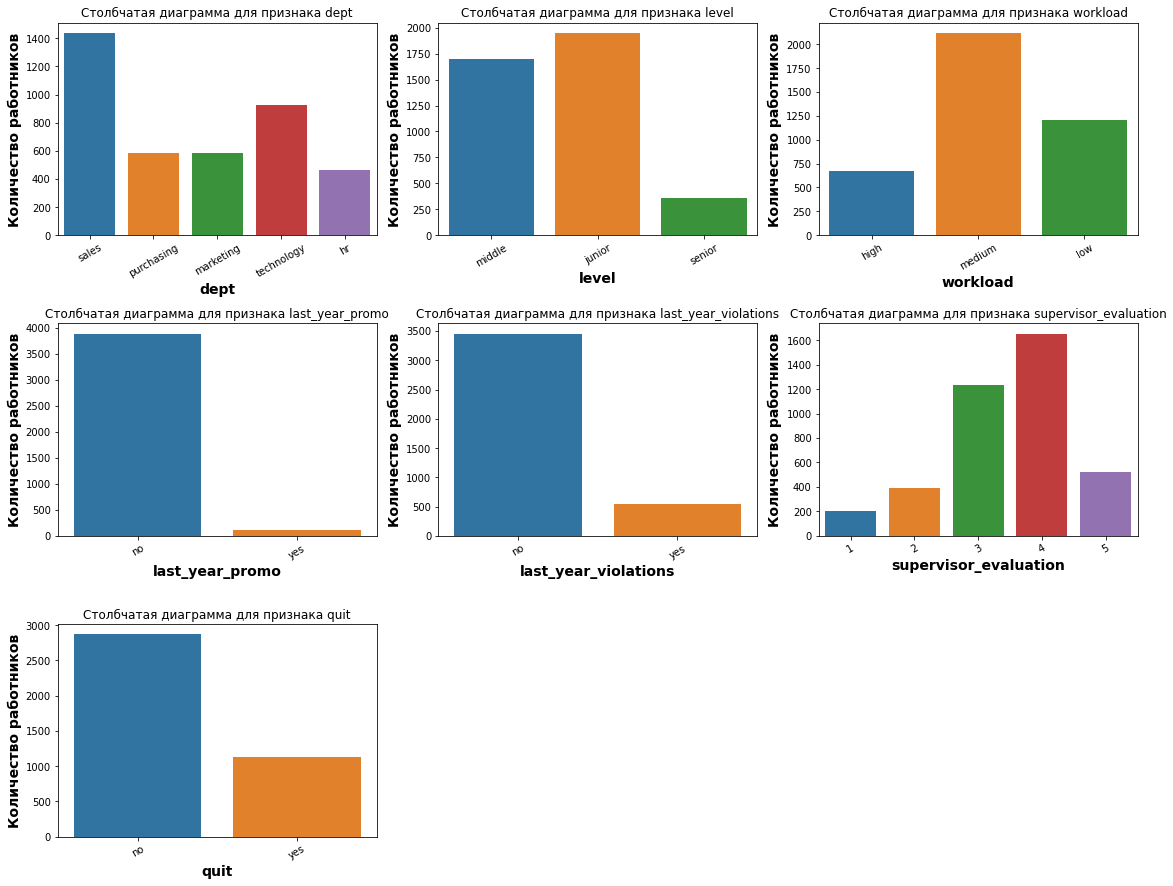

In [53]:
cat_features = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations', 'supervisor_evaluation', 'quit']

plt.figure(figsize=(16, 16))
for i, feature in enumerate(cat_features, start=1):
    
    plt.subplot(4, 3, i)
    sns.countplot(data=train_quit, x=feature)
    plt.title(f'Столбчатая диаграмма для признака {feature}')
    plt.ylabel('Количество работников', fontsize=14, fontweight='bold')
    plt.xlabel(feature, fontsize=14, fontweight='bold')
    plt.xticks(rotation=30)
    display(f'Частота значений для признака: {feature}',
            train_quit[feature].value_counts()
           )
    
plt.tight_layout()   
plt.show()    

- Большинство сотрудников работают в отделе продаж (1438 чел.), меньшинство - в hr (464 чел.);
- Большинство сотрудников работает на уровне junior (1949 чел.), меньшинство — на уровне сеньора (357 чел.);
- У большинства сотрудников средний уровень нагрузки (2118 чел.), у меньшинства — высокий (674 чел.);
- Большинство сотрудников  не получали повышения за последний год (3887 чел.), меньшинство — получали (113 чел.);
- У большинства сотрудников не было нарушений трудового договора за последний год (3455 чел.), у меньшинства — были нарушения (545 чел.)
- У большинства сотрудников работа оценивается в 4 балла (1654 чел.), у меньшинства — в 1 балл (202 чел.)
- Большинство сотрудников остались в компании (2872 чел.), меньшинство — уволились (1128 чел.)

count     4000.000000
mean     33805.800000
std      15152.415163
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64

count    4000.000000
mean        3.701500
std         2.541852
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64

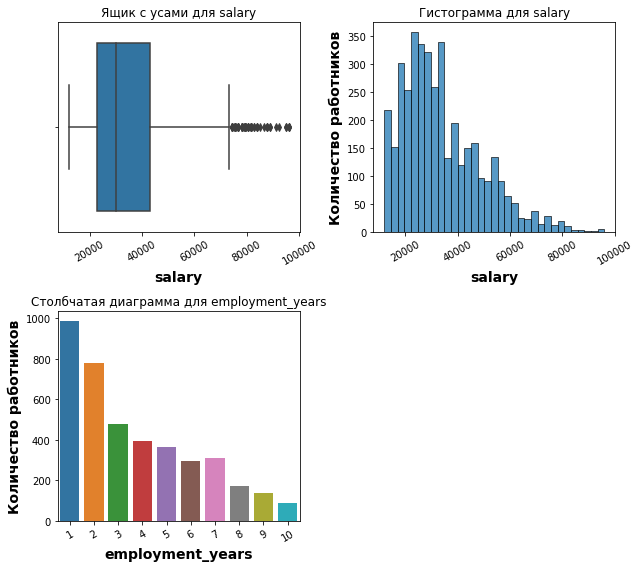

In [54]:
plt.figure(figsize=(9, 8))

plt.subplot(2, 2, 1)
sns.boxplot(data=train_quit, x='salary')
plt.title('Ящик с усами для salary')
plt.xlabel('salary', fontsize=14, fontweight='bold')
plt.xticks(rotation=30)

plt.subplot(2, 2, 2)
sns.histplot(data=train_quit, x='salary')
plt.title('Гистограмма для salary')
plt.ylabel('Количество работников', fontsize=14, fontweight='bold')
plt.xlabel('salary', fontsize=14, fontweight='bold')
plt.xticks(rotation=30)

plt.subplot(2, 2, 3)
sns.countplot(data=train_quit, x='employment_years')
plt.title('Столбчатая диаграмма для employment_years')
plt.ylabel('Количество работников', fontsize=14, fontweight='bold')
plt.xlabel('employment_years', fontsize=14, fontweight='bold')
plt.xticks(rotation=30)
display(
        train_quit['salary'].describe(),
        train_quit['employment_years'].describe(),
       )
    
plt.tight_layout()   
plt.show()    

- Для признака employment_years характерно распределение Пуассона, минимальное значение — год, максимальное — 10 лет, среднее — 3.7 года, медиана — 3 года;
- Для признака salary характерно распределение Пуассона, минимальное значение — 12000, максимальное — 96000. Медианная зп - 30000. 

### Корреляционный анализ
[Назад к содержанию](#содержание)

<function matplotlib.pyplot.show(close=None, block=None)>

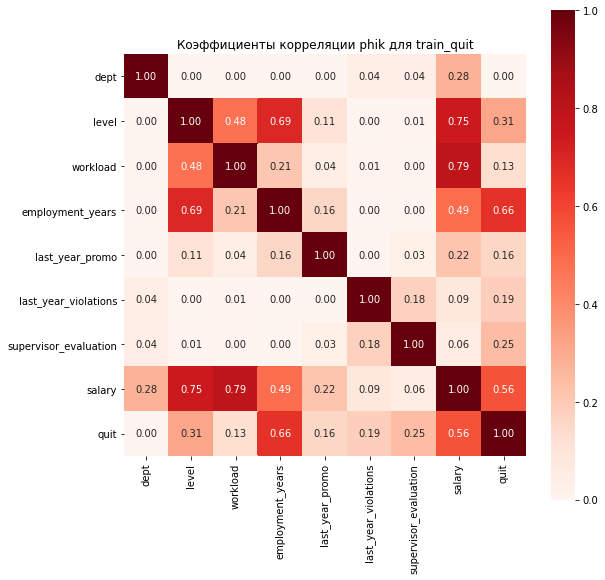

In [55]:
phik_matrix = train_quit.phik_matrix(interval_cols=interval_cols)
plt.figure(figsize=(9,9))
sns.heatmap(phik_matrix, annot=True, cmap='Reds', fmt='.2f', square=True, cbar=True)
plt.title('Коэффициенты корреляции phik для train_quit')
plt.show()

**Выводы по анализу признаков на основе коэффициентов phik:**
- высокая корреляция между длительностью работы и уровнем сотрудника (0.69), между зп и уровнем сотрудника (0.75), между загрузкой сотрудника и его зп (0.79), между длительностью работы и увольнением (0.66);
- средняя корреляция между зп и длительностью работы (0.49), уровнем сотрудника и нагрузкой (0.48), зп и увольнением (0.56)
- слабая корреляция между зп и отделом (0.28), зп и повышением (0.22), оценками качества и отделом (0.11), оценками качества и нарушениями ТД (0.18), между уровнем сотрудника и повышением (0.11), между уровнем сотрудника и увольнением (0.31), между увольнением и нагрузкой (0.13), между увольнением и повышением (0.16), между увольнением и нарушениями ТД (0.19), между увольнением и оценками качества (0.25), между длительностью работы и повышением (0.16), между длительностью работы и нагрузкой (0.21).


### Портрет уволившегося сотрудника
[Назад к содержанию](#содержание)

Далеее составим портрет уволившегося сотрудника. Разбобьём нашу выборку на две подвыборки на основании целевого признака. То есть, один датасет будет с уволившимися сотрудниками, а второй - с оставшимися.

In [56]:
quit = train_quit[train_quit['quit'] == 'yes']
stay = train_quit[train_quit['quit'] == 'no']
display(quit, stay)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
257132,sales,junior,medium,2,no,yes,3,24000,yes
699916,sales,junior,low,1,no,yes,3,18000,yes
613206,technology,middle,medium,2,no,no,3,45600,yes
468145,technology,junior,medium,2,no,no,3,30000,yes
982346,marketing,junior,medium,3,no,no,3,30000,yes
...,...,...,...,...,...,...,...,...,...
150315,purchasing,junior,low,1,no,no,2,15600,yes
778735,technology,junior,low,2,no,no,4,22800,yes
775320,technology,junior,high,1,no,no,4,42000,yes


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no
814010,sales,junior,medium,2,no,no,4,27600,no
155091,purchasing,middle,medium,5,no,no,1,37200,no
910140,marketing,junior,medium,2,no,no,5,25200,no
417070,technology,middle,medium,8,no,no,2,44400,no
...,...,...,...,...,...,...,...,...,...
106936,marketing,junior,low,1,no,no,5,18000,no
387733,marketing,middle,medium,5,no,no,3,44400,no
588809,sales,junior,medium,4,no,no,3,26400,no


Проанализируем все категориальные признаки quit, затем сравним его по количественным признакам со stay.

'Частота значений для признака: dept'

sales         0.360816
technology    0.244681
purchasing    0.147163
marketing     0.144504
hr            0.102837
Name: dept, dtype: float64

'Частота значений для признака: level'

junior    0.889184
middle    0.095745
senior    0.015071
Name: level, dtype: float64

'Частота значений для признака: workload'

low       0.460106
medium    0.432624
high      0.107270
Name: workload, dtype: float64

'Частота значений для признака: last_year_promo'

no     0.999113
yes    0.000887
Name: last_year_promo, dtype: float64

'Частота значений для признака: last_year_violations'

no     0.797872
yes    0.202128
Name: last_year_violations, dtype: float64

'Частота значений для признака: supervisor_evaluation'

3    0.463652
4    0.253546
2    0.145390
1    0.084220
5    0.053191
Name: supervisor_evaluation, dtype: float64

'Частота значений для признака: quit'

yes    1.0
Name: quit, dtype: float64

'Частота значений для признака: employment_years'

1     0.531028
2     0.257092
3     0.144504
4     0.023936
5     0.020390
6     0.008865
7     0.006206
8     0.002660
9     0.002660
10    0.002660
Name: employment_years, dtype: float64

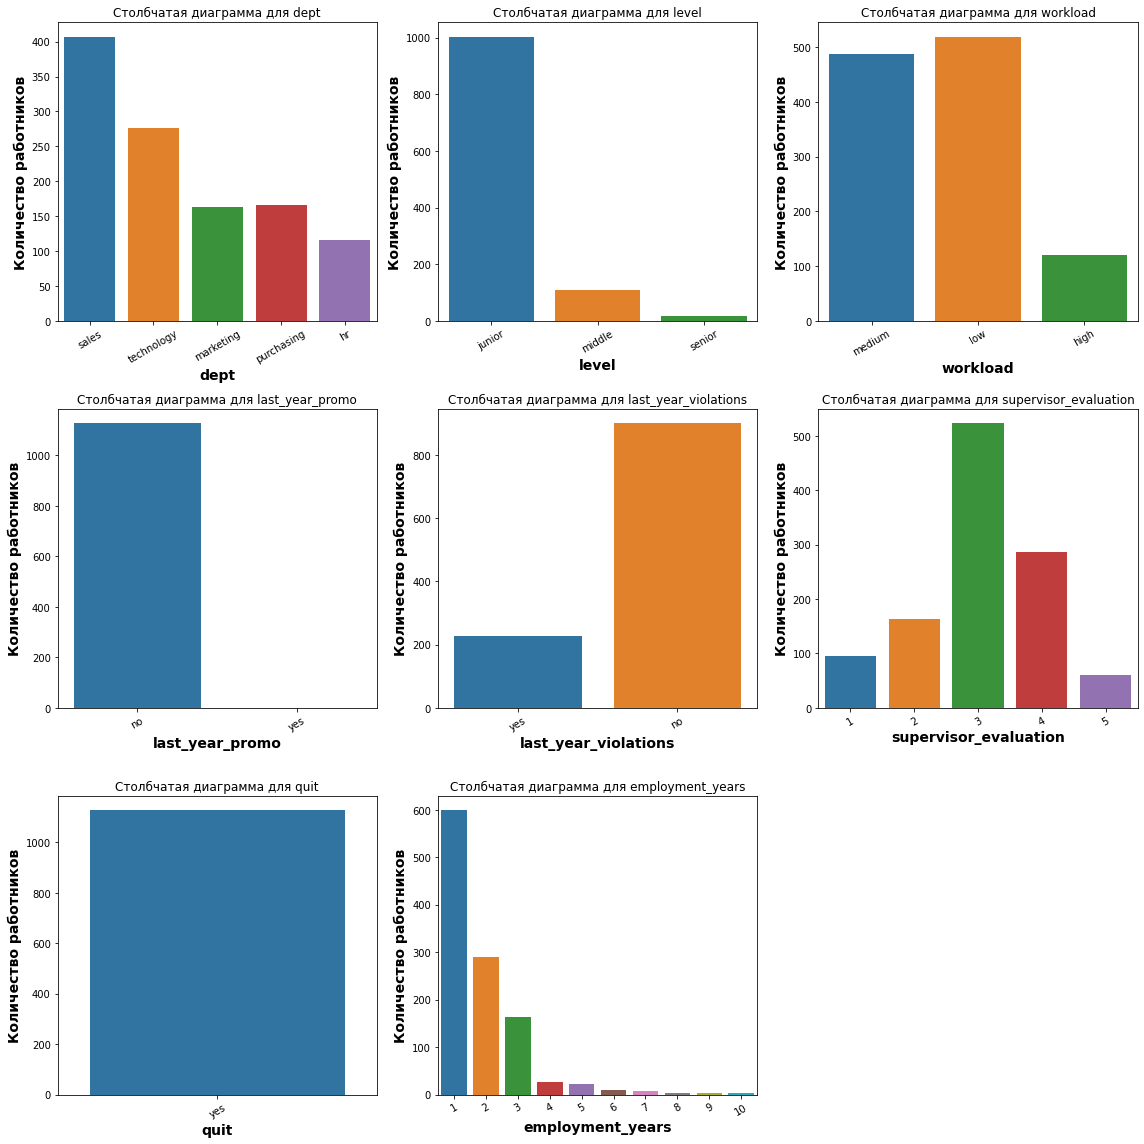

In [57]:
cat_features = [
                'dept', 'level', 'workload', 
                'last_year_promo', 'last_year_violations',
                'supervisor_evaluation', 'quit', 
                'employment_years'
]

plt.figure(figsize=(16, 16))
for i, feature in enumerate(cat_features, start=1):
    
    plt.subplot(3, 3, i)
    sns.countplot(data=quit, x=feature)
    plt.title(f'Столбчатая диаграмма для {feature}')
    plt.ylabel('Количество работников', fontsize=14, fontweight='bold')
    plt.xlabel(feature, fontsize=14, fontweight='bold')
    plt.xticks(rotation=30)
    display(f'Частота значений для признака: {feature}',
            quit[feature].value_counts(normalize=True)
           )
    
plt.tight_layout()   
plt.show()    

- Больше всего сотрудников уволилось из отдела продаж (36 %), меньше всего — из hr (10.3 %);
- Больше всего уволилось специалистов уровня junior (88.9 %), меньше всего — уровня senior (1.5 %);
- Увольнялись сотрудники как с низкой (46 %), так и со средней загрузкой (43.3 %). С высокой загрузкой специалистов уволилось меньше (10.7 %);
- Подавляющее число уволившихся не получали повышение за последний год (99.9 %);
- Большинство уволившихся не нарушали ТД за последний год (79.8 %), меньшинство — нарушали (20.2 %);
- Работа у большинства уволившихся была оценена в 3 балла (46.4 %), у меньшинства — в 5 баллов (5.3 %).
- Большинство уволившихся проработали в компании 1 год (53.1 %), 2 года (25.7 %) и 3 года (14.5 %).

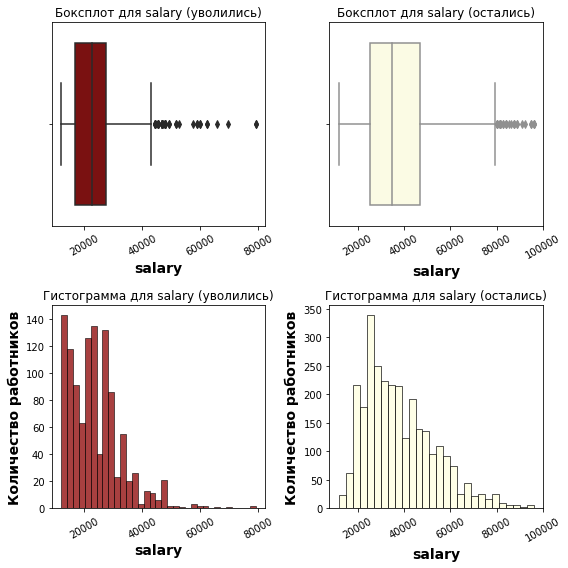

'Средняя зп среди уволившихся сотрудников:'

23885.106382978724

'Средняя зп среди оставшихся сотрудников:'

37702.22841225627

In [58]:
plt.figure(figsize=(8, 8)) 
    
plt.subplot(2, 2, 1)
sns.boxplot(data=quit, x='salary', color='darkred')
plt.title('Боксплот для salary (уволились)')
plt.xlabel('salary', fontsize=14, fontweight='bold')
plt.xticks(rotation=30) 

plt.subplot(2, 2, 2)
sns.boxplot(data=stay, x='salary', color='lightyellow')
plt.title('Боксплот для salary (остались)')
plt.xlabel('salary', fontsize=14, fontweight='bold')
plt.xticks(rotation=30)


plt.subplot(2, 2, 3)
sns.histplot(data=quit, x='salary', color='darkred')
plt.title('Гистограмма для salary (уволились)')
plt.ylabel('Количество работников', fontsize=14, fontweight='bold')
plt.xlabel('salary', fontsize=14, fontweight='bold')
plt.xticks(rotation=30)

plt.subplot(2, 2, 4)
sns.histplot(data=stay, x='salary', color='lightyellow')
plt.title('Гистограмма для salary (остались)')
plt.ylabel('Количество работников', fontsize=14, fontweight='bold')
plt.xlabel('salary', fontsize=14, fontweight='bold')
plt.xticks(rotation=30)
    
plt.tight_layout()   
plt.show()     
 
         
display(
        'Средняя зп среди уволившихся сотрудников:',
        quit['salary'].mean(),

        'Средняя зп среди оставшихся сотрудников:',
        stay['salary'].mean()
   )    

Средняя зп среди уволившихся — 23885 руб., среди оставшиихся — 37702 руб. 


Далее на основе тестовых данных проверим утверждение аналитиков компании: «уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник».

### Проверка связи job_satisfaction_rate и quit
[Назад к содержанию](#содержание)

In [59]:
test_features = test_features.reset_index()
test_features = pd.merge(test_features, test_quit, on='id').set_index('id')
test_features

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
id,,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.79,no
686555,hr,junior,medium,1,no,no,4,30000,0.72,no
467458,sales,middle,low,5,no,no,4,19200,0.64,no
418655,sales,middle,low,6,no,no,4,19200,0.60,no
789145,hr,middle,medium,5,no,no,5,40800,0.75,no
...,...,...,...,...,...,...,...,...,...,...
393147,marketing,junior,low,3,no,no,3,20400,0.56,yes
109582,technology,middle,low,3,no,no,2,21600,0.14,yes
305653,technology,junior,low,1,no,no,3,14400,0.11,yes


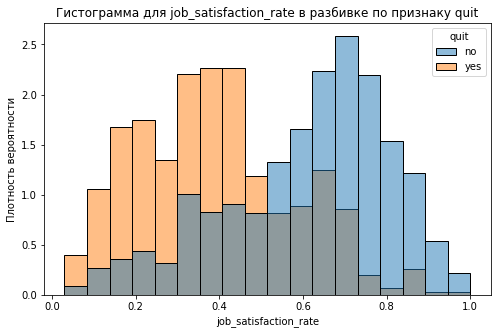

,count,mean,std,min,25%,50%,75%,max
quit,,,,,,,,
no,1436.0,0.612040,0.199367,0.03,0.50,0.66,0.7600,1.00
yes,564.0,0.387713,0.185784,0.04,0.24,0.37,0.4925,0.97


In [60]:
plt.figure(figsize=(8, 5))
sns.histplot(data=test_features, x='job_satisfaction_rate', hue='quit', stat='density', common_norm=False)
plt.title('Гистограмма для job_satisfaction_rate в разбивке по признаку quit')
plt.ylabel('Плотность вероятности')
plt.show()

stats = test_features.groupby('quit')['job_satisfaction_rate'].describe()
stats

Минимальные и максимальные значения job_satisfaction_rate между уволившимися и оставшимися сотрудниками отличаются незначительно. Однако среднее, медиана, 1 и 3 квартили у уволившихся сотрудников имеют значения ниже, чем у оставшихся в компании. При этом стандартное отклонение по группам практически одинаковое. Чтобы подтвердить наши выводы, проведём ttest для двух независимых выборок: уволившихся и оставшихся сотрудников из test_features.


Нулевая гипотеза: среднее по признаку job_satisfaction_rate **не отличается** среди уволившихся и оставшихся сотрудников.

Альтернативная гипотеза: среднее по признаку job_satisfaction_rate среди уволившихся сотрудников **меньше**, чем среди оставшихся.

In [61]:
sample1 = test_features.loc[test_features['quit'] == 'yes', 'job_satisfaction_rate']
sample2 = test_features.loc[test_features['quit'] == 'no', 'job_satisfaction_rate']
alpha = .01

results = st.ttest_ind(
                       sample1,
                       sample2,
                       alternative='less'
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('''Отвергаем нулевую гипотезу. Уровень удовлетворённости уволившихся сотрудников в среднем ниже, чем у оставшихся.''')
else:
    print('''Не получилось отвергнуть нулевую гипотезу.
    Мы не можем утверждать, что уровень удовлетворённости уволившихся сотрудников в среднем ниже, чем у оставшихся.''')

p-значение: 6.155610332585965e-105
Отвергаем нулевую гипотезу. Уровень удовлетворённости уволившихся сотрудников в среднем ниже, чем у оставшихся.


Таким образом, делаем вывод о взаимосвязи job_satisfaction_rate и quit. На следующем шаге добавим job_satisfaction_rate, предсказанный лучшей моделью первой задачи, к входным признакам второй задачи. 

**Вывод по исследовательскому анализу данных**

- Большинство сотрудников работают в отделе продаж (1438 чел.), меньшинство - в hr (464 чел.);
- Большинство сотрудников работает на уровне junior (1949 чел.), меньшинство — на уровне сеньора (357 чел.);
- У большинства сотрудников средний уровень нагрузки (2118 чел.), у меньшинства — высокий (674 чел.);
- Большинство сотрудников  не получали повышения за последний год (3887 чел.), меньшинство — получали (113 чел.);
- У большинства сотрудников не было нарушений трудового договора за последний год (3455 чел.), у меньшинства — были нарушения (545 чел.)
- У большинства сотрудников работа оценивается в 4 балла (1654 чел.), у меньшинства — в 1 балл (202 чел.)
- Большинство сотрудников остались в компании (2872 чел.), меньшинство — уволились (1128 чел.)
- Для признака employment_years характерно распределение Пуассона, минимальное значение — год, максимальное — 10 лет, среднее — 3.7 года, медиана — 3 года;
- Для признака salary характерно распределение Пуассона, минимальное значение — 12000, максимальное — 96000. Медианная зп - 30000. 

**Выводы по корреляционному анализу признаков на основе коэффициентов phik:**
- высокая корреляция между длительностью работы и уровнем сотрудника (0.69), между зп и уровнем сотрудника (0.75), между загрузкой сотрудника и его зп (0.79), между длительностью работы и увольнением (0.66);
- средняя корреляция между зп и длительностью работы (0.49), уровнем сотрудника и нагрузкой (0.48), зп и увольнением (0.56)
- слабая корреляция между зп и отделом (0.28), зп и повышением (0.22), оценками качества и отделом (0.11), оценками качества и нарушениями ТД (0.18), между уровнем сотрудника и повышением (0.11), между уровнем сотрудника и увольнением (0.31), между увольнением и нагрузкой (0.13), между увольнением и повышением (0.16), между увольнением и нарушениями ТД (0.19), между увольнением и оценками качества (0.25), между длительностью работы и повышением (0.16), между длительностью работы и нагрузкой (0.21).

**Портрет уволившегося сотрудника**
- Больше всего сотрудников уволилось из отдела продаж (36 %), меньше всего — из hr (10.3 %);
- Больше всего уволилось специалистов уровня junior (88.9 %), меньше всего — уровня senior (1.5 %);
- Увольнялись сотрудники как с низкой (46 %), так и со средней загрузкой (43.3 %). С высокой загрузкой специалистов уволилось меньше (10.7 %);
- Подавляющее число уволившихся не получали повышение за последний год (99.9 %);
- Большинство уволившихся не нарушали ТД за последний год (79.8 %), меньшинство — нарушали (20.2 %);
- Работа у большинства уволившихся была оценена в 3 балла (46.4 %), у меньшинства — в 5 баллов (5.3 %).
- Большинство уволившихся проработали в компании 1 год (53.1 %), 2 года (25.7 %) и 3 года (14.5 %).
- Средняя зп среди уволившихся — 23885 руб., среди оставшиихся — 37702 руб. 


**Проверка связи job_satisfaction_rate и quit**

Минимальные и максимальные значения job_satisfaction_rate между уволившимися и оставшимися сотрудниками отличаются незначительно. Однако среднее, медиана, 1 и 3 квартили у уволившихся сотрудников имеют значения ниже, чем у оставшихся в компании. При этом стандартное отклонение по группам практически одинаковое. Также был проведён тест Стьюдента — по его результатам, уровень удовлетворённости уволившихся сотрудников в среднем ниже, чем у оставшихся.
Таким образом, делаем вывод о взаимосвязи job_satisfaction_rate и quit.

<a id=10></a>
## Добавление нового входного признака

[Назад к содержанию](#содержание)

Сначала добавим признак в тестовую выборку.

In [62]:
test_features['job_satisfaction_rate_pred'] = search.best_estimator_.predict(X_test_transformed)
test_features

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit,job_satisfaction_rate_pred
id,,,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.79,no,0.837297
686555,hr,junior,medium,1,no,no,4,30000,0.72,no,0.657826
467458,sales,middle,low,5,no,no,4,19200,0.64,no,0.664000
418655,sales,middle,low,6,no,no,4,19200,0.60,no,0.664000
789145,hr,middle,medium,5,no,no,5,40800,0.75,no,0.807978
...,...,...,...,...,...,...,...,...,...,...,...
393147,marketing,junior,low,3,no,no,3,20400,0.56,yes,0.512000
109582,technology,middle,low,3,no,no,2,21600,0.14,yes,0.133333
305653,technology,junior,low,1,no,no,3,14400,0.11,yes,0.240000


Проверим train_quit на наличие дубликатов. Если они есть — удалим.

In [63]:
train_quit.duplicated().value_counts()

False    2587
True     1413
dtype: int64

In [64]:
train_quit.drop_duplicates(inplace=True)
train_quit

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no
814010,sales,junior,medium,2,no,no,4,27600,no
155091,purchasing,middle,medium,5,no,no,1,37200,no
257132,sales,junior,medium,2,no,yes,3,24000,yes
910140,marketing,junior,medium,2,no,no,5,25200,no
...,...,...,...,...,...,...,...,...,...
778735,technology,junior,low,2,no,no,4,22800,yes
106936,marketing,junior,low,1,no,no,5,18000,no
775320,technology,junior,high,1,no,no,4,42000,yes


Далее разобъём train_quit на входные и целевой признаки. Входные подготовим с помощью нашего старого препроцессора, затем предскажем значения job_satisfaction_rate_pred и добавим его в датасет входных признаков.

In [65]:
X_train = train_quit.drop('quit', axis=1)  
y_train = train_quit['quit'] 

train_quit_transformed = preprocessor.transform(X_train)
X_train['job_satisfaction_rate_pred'] = search.best_estimator_.predict(train_quit_transformed)
X_train

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate_pred
id,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,0.602105
814010,sales,junior,medium,2,no,no,4,27600,0.837297
155091,purchasing,middle,medium,5,no,no,1,37200,0.402143
257132,sales,junior,medium,2,no,yes,3,24000,0.334444
910140,marketing,junior,medium,2,no,no,5,25200,0.813636
...,...,...,...,...,...,...,...,...,...
778735,technology,junior,low,2,no,no,4,22800,0.855000
106936,marketing,junior,low,1,no,no,5,18000,0.850909
775320,technology,junior,high,1,no,no,4,42000,0.608261


<a id=11></a>
## Подготовка данных

[Назад к содержанию](#содержание)

In [66]:
le = LabelEncoder()
le.fit(y_train)
le.classes_ = np.array(['no', 'yes'])
y_train_transformed = le.transform(y_train)
y_train_transformed

array([0, 0, 0, ..., 1, 1, 0])

In [67]:
X_test = test_features.drop(['quit', 'job_satisfaction_rate'], axis=1) 
y_test = test_features['quit'] 
y_test_transformed = le.transform(y_test)
y_test_transformed

array([0, 0, 0, ..., 1, 0, 0])

In [68]:
num_features = ['employment_years', 'salary', 'supervisor_evaluation', 'job_satisfaction_rate']

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

<a id=12></a>
## Обучение модели

[Назад к содержанию](#содержание)

In [69]:
pipeline = Pipeline(
    steps=[
    (
        'model', DecisionTreeClassifier(random_state=RANDOM_STATE)
    )  
]
)

param_grid = [
    {
        'model': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'model__max_depth': range(1, 10),
        'model__min_samples_split': range(2, 7),
        'model__min_samples_leaf': range(1, 3)
    },
    {
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': range(2, 7),
    },
    {
       'model': [LogisticRegression(solver='liblinear', penalty='l1', random_state=RANDOM_STATE)],
       'model__C': np.linspace(0.1, 3, 10),
    }
]


search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

search.fit(X_train_transformed, y_train_transformed)

results_quit = pd.DataFrame(search.cv_results_)

best_model = search.best_estimator_
best_params = search.best_params_
best_score = search.best_score_

display(F"Лучшая модель: {best_model}")
display(f"Лучшие параметры: {best_params}")
display(f"Метрика лучшей модели на кросс-валидации: {best_score}") 

Fitting 5 folds for each of 105 candidates, totalling 525 fits


"Лучшая модель: Pipeline(steps=[('model',\n                 DecisionTreeClassifier(max_depth=5, min_samples_split=4,\n                                        random_state=42))])"

"Лучшие параметры: {'model': DecisionTreeClassifier(random_state=42), 'model__max_depth': 5, 'model__min_samples_leaf': 1, 'model__min_samples_split': 4}"

'Метрика лучшей модели на кросс-валидации: 0.9018939046684042'

In [70]:
 display(results_quit[['params', 'mean_test_score', 'rank_test_score']])

,params,mean_test_score,rank_test_score
0,{'model': DecisionTreeClassifier(random_state=...,0.801002,96
1,{'model': DecisionTreeClassifier(random_state=...,0.801002,96
2,{'model': DecisionTreeClassifier(random_state=...,0.801002,96
3,{'model': DecisionTreeClassifier(random_state=...,0.801002,96
4,{'model': DecisionTreeClassifier(random_state=...,0.801002,96
...,...,...,...
100,"{'model': LogisticRegression(penalty='l1', ran...",0.900699,25
101,"{'model': LogisticRegression(penalty='l1', ran...",0.900719,24
102,"{'model': LogisticRegression(penalty='l1', ran...",0.900834,23
103,"{'model': LogisticRegression(penalty='l1', ran...",0.900881,12


In [71]:
roc_auc = roc_auc_score(y_test_transformed, search.best_estimator_.predict_proba(X_test_transformed)[:, 1])
display(f'Метрика roc-auc на тестовой выборке: {roc_auc:.2f}')

'Метрика roc-auc на тестовой выборке: 0.91'

In [72]:
dummy_сlf = DummyClassifier(strategy="most_frequent")
dummy_сlf.fit(X_train_transformed, y_train_transformed)
y_pred_dummy = dummy_сlf.predict(X_test_transformed)
roc_auc_dummy = roc_auc_score(y_test_transformed, y_pred_dummy)
display(f'Метрика roc-auc на модели DummyClassifier: {roc_auc_dummy:.2f}')

'Метрика roc-auc на модели DummyClassifier: 0.50'

На тестовой выборке достигнуто значение roc_auc = 0.91 — успех! Наша модель превосходит метрику модели DummyClassifier (0.5). Таким образом, лучшая модель — дерево решений со следующими параметрами: 
- 'model__max_depth': 5,
- 'model__min_samples_leaf': 1, 
- 'model__min_samples_split': 4


Результаты  опробованных моделей сохранены в переменную results_quit.

<a id=13></a>
## Промежуточный вывод

[Назад к содержанию](#содержание)


Лучше всего с задачей классификации (предсказание увольнения сотрудника) справилось дерево решений. Это могло произойти из-за наличия нелинейных зависимостей между целевым и входными признаками. Также для этой модели перебиралось довольно много комбинаций параметров; для остальных моделей параметров было выбрано не так много, это могло сыграть роль. 

<a id=14></a>
## Итоговый вывод

[Назад к содержанию](#содержание)

### Задача 1. Предсказание уровня удовлетворённости сотрудника

**Описание задачи**

Построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 

#### Загрузка и предобработка данных


- В датасете train_job_satisfaction_rate 10 столбцов и 4000 строк. Количество ненулевых значений по столбцам отличается — значит, в датасете есть пропуски.
- Он состоит из следующих типов данных:
   - object
   - int64
   - float64
   
   
- В датасете test_features 9 столбцов и 2000 строк. Количество ненулевых значений по столбцам отличается — значит, в датасете есть пропуски.
- Он состоит из следующих типов данных:
   - object
   - int64
      
- В датасете test_target_job_satisfaction_rate 2 стобца и 2000 строк.
- Он состоит из следующих типов данных:
   - float64
   - int64
    
    
- Названия всех столбцов написаны в едином корректном стиле Snake_case;
- Данные соответствую своему описанию.

- в данных не обнаружено явных или неявных дубликатов
- обнаружены пропуски в столбцах dept и level датасета train_job_satisfaction_rate, а также в столбцах dept, level и workload датасета test_features. Они будут заполнены на шаге построения пайплайна.
- значения 'sinior' в столбце level заменены на 'senior' (датасеты train_job_satisfaction_rate, test_features)

#### Исследовательский и корреляционный анализ данных

**Вывод по исследовательскому анализу**

- Большинство сотрудников работают в отделе продаж (1512 чел.), меньшинство - в hr (456 чел.);
- Большинство сотрудников работает на уровне junior (1894 чел.), меньшинство — на уровне сеньора (358 чел.);
- У большинства сотрудников средний уровень нагрузки (2066 чел.), у меньшинства — высокий (734 чел.);
- Большинство сотрудников  не получали повышения за последний год (3880 чел.), меньшинство — получали (120 чел.);
- У большинства сотрудников не было нарушений трудового договора за последний год (3441 чел.), у меньшинства — были нарушения (559 чел.)
- Для признака employment_years характерно распределение Пуассона, минимальное значение — год, максимальное — 10 лет;
- Распределение признака supervisor_evaluation больше похоже на распределение категориального признака — все наблюдения распределены между пятью значениями признака. Самая частая оценка - 4 (1603 сотрудника), самая редкая — 1 (201 сотрудник);
- Для признака salary характерно распределение Пуассона, минимальное значение — 12000, максимальное — 98400. Медианная зп - 30000. Также видим довольно много наблюдений за «усом» боксплота - это сотрудники с самой высокой зарплатой. Нам не стоит удалять эти наблюдения. Предположим, что такие сотрудники — самые важные, тогда наша модель определённо должна предсказывать удовлетворённость этой группы её работой. В первую очередь мы хотим сохранить именно таких сотрудников, поэтому у модели должна быть о них информация.
- Для целевого признака job_satisfaction_rate характерно нормальное распределение, минимальное значение — 0.03, максимальное — 1. Медианное — 0.56. 

**Вывод по корреляционному анализу**

*Выводы по анализу количественных признаков на основе коэффициентов Спирмена:*
- высокая положительная корреляция наблюдается между уровнем удовлетворенности сотрудника и оценкой качества его работы руководителем (0.75);
- средняя положительная корреляция между длительностью работы в компании и зп (0.47);
- слабая положительная корреляция между длительностью работы в компании и уровнем удовлетворенности сотрудника (0.22); между зп и уровнем удовлетворенности сотрудника (0.13).

*Выводы по анализу всех прихнаков на основе коэффициентов phik:*
- высокая корреляция между длительностью работы и уровнем сотрудника (0.68), между зп и уровнем сотрудника (0.72), между загрузкой сотрудника и его зп (0.79);
- средняя корреляция между зп и длительностью работы (0.48), уровнем сотрудника и нагрузкой (0.42), уровнем удовлетворенности и нарушениями ТД (0.56)
- слабая корреляция между зп и отделом (0.28), зп и повышением (0.22), оценками качества и отделом (0.11), оценками качества и нарушениями ТД (0.18), между уровнем удовлетворенности и повышением (0.19), между уровнем сотрудника и повышением (0.10), между длительностью работы и повышением (0.18), между длительностью работы и нагрузкой (0.18). 

*Выводы по мультиколлинеарности:*

значения VIF в норме, они не превышают 1.7. Соответственно — мультиколлинеарности между количественными признаками нет.

#### Подготовка данных и обучение моделей

- построен пайплайн, который заполняет пропуски в данных и подготавливает их к обучению. В пайплайне использованы следующие методы кодирования и масштабирования: 
											
    - standart scaler для количественных признаков,
    - ohe — для кодирования категориальных признаков без определенного порядка,
    - orde - для кодирования категориальных признаков, у которых есть порядок (например, высокий, средний или низкий уровень загрузки сотрудника)

- Определена функция, которая рассчитывает метрику SMAPE.

- Далее в пайплайне были обучены модели линейной регрессии и дерево решений. С помощью GridSearchCV проведена оптимизация гиперпарметров.


По результатам кроссвалидации, лучшая модель — дерево решений со следующими параметрами: 
- 'model__max_depth': 10,
- 'model__min_samples_leaf': 1, 
- 'model__min_samples_split': 5

Её метрика SMAPE на тестовой выборке составила 14.82.

**Результаты всех опробованных моделей сохранены в переменную results.**

### Задача 2. Предсказание увольнения сотрудника из компании

**Описание задачи**

Построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

#### Загрузка и предобработка данных

В датасете train_quit 10 столбцов и 4000 строк. Количество ненулевых значений по столбцам не отличается — значит, явных пропусков в датасете нет.
- Он состоит из следующих типов данных:
   - object
   - int64
- Типы данных распределены корректно.
   
      
В датасете test_quit 2 стобца и 2000 строк. Количество ненулевых значений по столбцам не отличается — значит, явных пропусков в датасете нет.
- Он состоит из следующих типов данных:
   - object
   - int64
- Типы данных распределены корректно.    
    
    
Названия всех столбцов написаны в едином корректном стиле Snake_case.


Данные соответствую своему описанию.

- в данных не обнаружено явных или неявных дубликатов
- обнаружены пропуски в столбцах dept, level и workload датасета test_features. Они будут заполнены на шаге построения пайплайна.
- значения 'sinior' в столбце level заменены на 'senior' (датасет train_quit)

#### Исследовательский и корреляционный анализ данных

**Вывод по исследовательскому анализу данных**

- Большинство сотрудников работают в отделе продаж (1438 чел.), меньшинство - в hr (464 чел.);
- Большинство сотрудников работает на уровне junior (1949 чел.), меньшинство — на уровне сеньора (357 чел.);
- У большинства сотрудников средний уровень нагрузки (2118 чел.), у меньшинства — высокий (674 чел.);
- Большинство сотрудников  не получали повышения за последний год (3887 чел.), меньшинство — получали (113 чел.);
- У большинства сотрудников не было нарушений трудового договора за последний год (3455 чел.), у меньшинства — были нарушения (545 чел.)
- У большинства сотрудников работа оценивается в 4 балла (1654 чел.), у меньшинства — в 1 балл (202 чел.)
- Большинство сотрудников остались в компании (2872 чел.), меньшинство — уволились (1128 чел.)
- Для признака employment_years характерно распределение Пуассона, минимальное значение — год, максимальное — 10 лет, среднее — 3.7 года, медиана — 3 года;
- Для признака salary характерно распределение Пуассона, минимальное значение — 12000, максимальное — 96000. Медианная зп - 30000. 

**Выводы по корреляционному анализу признаков на основе коэффициентов phik:**
- высокая корреляция между длительностью работы и уровнем сотрудника (0.69), между зп и уровнем сотрудника (0.75), между загрузкой сотрудника и его зп (0.79), между длительностью работы и увольнением (0.66);
- средняя корреляция между зп и длительностью работы (0.49), уровнем сотрудника и нагрузкой (0.48), зп и увольнением (0.56)
- слабая корреляция между зп и отделом (0.28), зп и повышением (0.22), оценками качества и отделом (0.11), оценками качества и нарушениями ТД (0.18), между уровнем сотрудника и повышением (0.11), между уровнем сотрудника и увольнением (0.31), между увольнением и нагрузкой (0.13), между увольнением и повышением (0.16), между увольнением и нарушениями ТД (0.19), между увольнением и оценками качества (0.25), между длительностью работы и повышением (0.16), между длительностью работы и нагрузкой (0.21).

**Портрет уволившегося сотрудника**
- Больше всего сотрудников уволилось из отдела продаж (36 %), меньше всего — из hr (10.3 %);
- Больше всего уволилось специалистов уровня junior (88.9 %), меньше всего — уровня senior (1.5 %);
- Увольнялись сотрудники как с низкой (46 %), так и со средней загрузкой (43.3 %). С высокой загрузкой специалистов уволилось меньше (10.7 %);
- Подавляющее число уволившихся не получали повышение за последний год (99.9 %);
- Большинство уволившихся не нарушали ТД за последний год (79.8 %), меньшинство — нарушали (20.2 %);
- Работа у большинства уволившихся была оценена в 3 балла (46.4 %), у меньшинства — в 5 баллов (5.3 %).
- Большинство уволившихся проработали в компании 1 год (53.1 %), 2 года (25.7 %) и 3 года (14.5 %).
- Средняя зп среди уволившихся — 23885 руб., среди оставшиихся — 37702 руб. 


**Проверка связи job_satisfaction_rate и quit**

Минимальные и максимальные значения job_satisfaction_rate между уволившимися и оставшимися сотрудниками отличаются незначительно. Однако среднее, медиана, 1 и 3 квартили у уволившихся сотрудников имеют значения ниже, чем у оставшихся в компании. При этом стандартное отклонение по группам практически одинаковое. Также был проведён тест Стьюдента — по его результатам, уровень удовлетворённости уволившихся сотрудников в среднем ниже, чем у оставшихся.
Таким образом, делаем вывод о взаимосвязи job_satisfaction_rate и quit.

#### Подготовка данных и обучение моделей


- построен пайплайн, который заполняет пропуски в данных и подготавливает их к обучению. В пайплайне использованы следующие методы кодирования и масштабирования: 
											
    - standart scaler для количественных признаков,
    - ohe — для кодирования категориальных признаков без определенного порядка,
    - orde - для кодирования категориальных признаков, у которых есть порядок (например, высокий, средний или низкий уровень загрузки сотрудника)

- Далее в пайплайне были обучены модели логистической регрессии, к-ближайших соседей и дерево решений. С помощью GridSearchCV проведена оптимизация гиперпарметров.

По результатам кросс-валидации, лучшая модель — дерево решений со следующими параметрами: 
- 'model__max_depth': 5,
- 'model__min_samples_leaf': 1, 
- 'model__min_samples_split': 4


Её метрика roc-auc на тестовой выборке составила 0.91.

**Результаты  опробованных моделей сохранены в переменную results_quit.**

### Рекомендации заказчику

Стоит в первую очередь обратить внимание на младших специалистов из отделов продаж и технологий, которые работают в компании не слишком долго. Эти сотрудники увольняются чаще всего. Также в ходе исследования мы подтвердили предположение о взаимосвязи увольнения с уровнем удовлетворённости сотрудника. 

Соответственно, чтобы минимизировать отток кадров из компании — нужно максимизировать их уровень удовлетворённости. Начинающим специалистам нужно предоставить переспективы увеличения зарплаты и карьерного роста в компании. Как мы выяснили, из 1128 уволившихся, только один сотрудник получал повышение за последний год.